In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__


'1.8.1'

In [2]:
df= pd.read_csv('Data/insurance - core.csv')
df.head()


age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [3]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
df.shape

(1338, 7)

## QUESTIONS TO ANSWER
-Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

In [5]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

#  Do smokers have higher insurance charges than non-smokers? 
- Null hypothesis= there is no difference in charges of smokers and those that dont smoke based on the data.
-alternative hypothesis there is a difference is charges in smokers and non smokers.
2.Select the correct test according to the data type and number of samples.  (2 Sample T Test)






In [7]:
smokers_df =df.loc[df['smoker']=='yes'].copy()
non_smokers= df.loc[df['smoker']=='no'].copy()

In [8]:
smokers_stats= smokers_df['charges'].agg(['mean', 'std', 'min', 'max'])

In [9]:
non_smokers_stats= non_smokers['charges'].agg(['mean', 'std', 'min', 'max'])

In [10]:
smokers= df.loc[df['smoker']=='yes'].copy
smokers()

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
11     62  female  26.290         0    yes  southeast  27808.72510
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
...   ...     ...     ...       ...    ...        ...          ...
1313   19  female  34.700         2    yes  southwest  36397.57600
1314   30  female  23.655         3    yes  northwest  18765.87545
1321   62    male  26.695         0    yes  northeast  28101.33305
1323   42  female  40.370         2    yes  southeast  43896.37630
1337   61  female  29.070         0    yes  northwest  29141.36030

[274 rows x 7 columns]

In [11]:
smokers_df['charges'].mean()

32050.23183153284

In [12]:
non_smokers['charges'].mean()

8434.268297856204

In [13]:
xs= np.linspace( smokers_stats.loc['min'], smokers_stats.loc['max'])
xs

array([12829.4551    , 13869.06679204, 14908.67848408, 15948.29017612,
       16987.90186816, 18027.5135602 , 19067.12525224, 20106.73694429,
       21146.34863633, 22185.96032837, 23225.57202041, 24265.18371245,
       25304.79540449, 26344.40709653, 27384.01878857, 28423.63048061,
       29463.24217265, 30502.85386469, 31542.46555673, 32582.07724878,
       33621.68894082, 34661.30063286, 35700.9123249 , 36740.52401694,
       37780.13570898, 38819.74740102, 39859.35909306, 40898.9707851 ,
       41938.58247714, 42978.19416918, 44017.80586122, 45057.41755327,
       46097.02924531, 47136.64093735, 48176.25262939, 49215.86432143,
       50255.47601347, 51295.08770551, 52334.69939755, 53374.31108959,
       54413.92278163, 55453.53447367, 56493.14616571, 57532.75785776,
       58572.3695498 , 59611.98124184, 60651.59293388, 61691.20462592,
       62730.81631796, 63770.42801   ])

In [14]:
ys=stats.norm.pdf(xs,loc= smokers_stats.loc['mean'], scale = smokers_stats.loc['std'])
ys

array([8.63789820e-06, 9.99525367e-06, 1.14724418e-05, 1.30615347e-05,
       1.47505718e-05, 1.65234148e-05, 1.83597626e-05, 2.02353452e-05,
       2.21223102e-05, 2.39898007e-05, 2.58047173e-05, 2.75326412e-05,
       2.91388862e-05, 3.05896369e-05, 3.18531216e-05, 3.29007638e-05,
       3.37082545e-05, 3.42564891e-05, 3.45323187e-05, 3.45290741e-05,
       3.42468340e-05, 3.36924216e-05, 3.28791308e-05, 3.18261960e-05,
       3.05580362e-05, 2.91033144e-05, 2.74938630e-05, 2.57635308e-05,
       2.39470103e-05, 2.20787012e-05, 2.01916611e-05, 1.83166850e-05,
       1.64815483e-05, 1.47104325e-05, 1.30235439e-05, 1.14369236e-05,
       9.96243643e-06, 8.60791975e-06, 7.37746501e-06, 6.27180303e-06,
       5.28876130e-06, 4.42376272e-06, 3.67033737e-06, 3.02062247e-06,
       2.46583048e-06, 1.99666997e-06, 1.60370934e-06, 1.27767776e-06,
       1.00970223e-06, 7.91483010e-07])

In [15]:
p_below = stats.norm.cdf(8434,loc= smokers_stats.loc['mean'], scale = smokers_stats.loc['std'])
p_below

0.02036869804036484

In [16]:
1 - p_below

0.9796313019596352

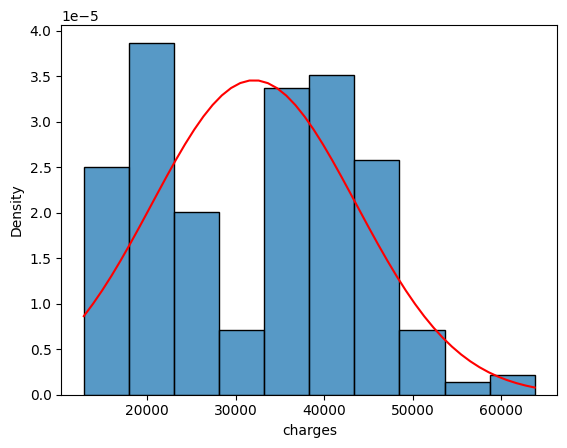

In [17]:
ax=sns.histplot(data=smokers_df, x = 'charges',stat = 'density')
ax.plot(xs, ys, color ='red');

In [18]:
grp_yes =df.loc[df['smoker']=='yes', ]
grp_no= df.loc[df['smoker']=='no']

In [31]:
np.abs(stats.zscore(grp_yes)) >.5

TypeError: unsupported operand type(s) for /: 'str' and 'int'

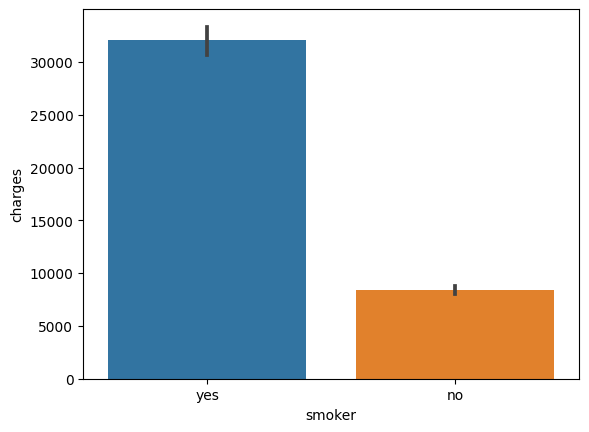

In [19]:
ax=sns.barplot(data=df, x = 'smoker',y = 'charges')

## 3. Do different regions have different charges, on average

[Text(0, 0, 'southwest'),
 Text(1, 0, 'southeast'),
 Text(2, 0, 'northwest'),
 Text(3, 0, 'northeast')]

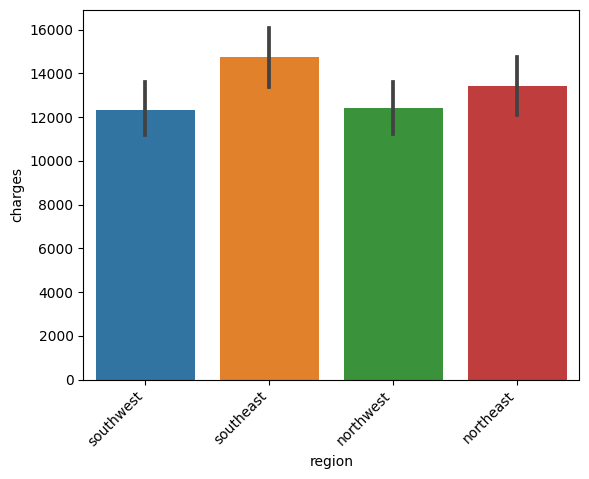

In [20]:
ax=sns.barplot(data=df, x = 'region',y = 'charges')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha= 'right')

In [21]:
needed_cols=['region', 'charges']
df[needed_cols]

region      charges
0     southwest  16884.92400
1     southeast   1725.55230
2     southeast   4449.46200
3     northwest  21984.47061
4     northwest   3866.85520
...         ...          ...
1333  northwest  10600.54830
1334  northeast   2205.98080
1335  southeast   1629.83350
1336  southwest   2007.94500
1337  northwest  29141.36030

[1338 rows x 2 columns]

In [22]:
groups = {}
for region in df['region'].unique():
    temp=df.loc[df['region']==region, 'charges']
    groups[region]= temp
    
    
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [23]:
groups.items()

dict_items([('southwest', 0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: charges, Length: 325, dtype: float64), ('southeast', 1        1725.5523
2        4449.4620
5        3756.6216
6        8240.5896
11      27808.7251
           ...    
1322    12981.3457
1323    43896.3763
1327     9377.9047
1330    12629.1656
1335     1629.8335
Name: charges, Length: 364, dtype: float64), ('northwest', 3       21984.47061
4        3866.85520
7        7281.50560
9       28923.13692
24       6203.90175
           ...     
1319     7201.70085
1320     5425.02335
1324     4239.89265
1333    10600.54830
1337    29141.36030
Name: charges, Length: 325, dtype: float64), ('northeast', 8        6406.41070
10       2721.32080
16      10797.33620
17       2395.17155
20      13228.84695
           ...     
1321    28101.33305
1325    

#  check for outliers

In [24]:
temp = np.abs(stats.zscore(groups['southwest'])) > 3
temp.value_counts()

False    317
True       8
Name: charges, dtype: int64

In [25]:
#loop  through group dict
for region,data in groups.items():
    #determine if there are any outliers
    outliers= np.abs(stats.zscore(data)) > 3
    ##Print a statement about how many outliers for which group name
    print(f'there were {outliers.sum()} outliers in the {region} group')
    ##Remove the outliers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[region] = data 

there were 8 outliers in the southwest group
there were 2 outliers in the southeast group
there were 7 outliers in the northwest group
there were 4 outliers in the northeast group


# Test for normality

In [26]:
stats.normaltest(groups['southwest']).pvalue<0.5

True

In [27]:
norm_results = [['group', 'n', 'pval', 'sig?']]

#loop through with dict
for region, data in groups.items():
    #calculate normaltest 
    stat, p = stats.normaltest(data)
    
    #append the correct info into norm results (as a list)
    norm_results.append([region, len(data), p , p<0.5])
    
    
#make norm_results a df (first row in columns , everything else data) 
normal_results = pd.DataFrame (norm_results[1:], columns = norm_results[0])
normal_results

group    n          pval  sig?
0  southwest  317  7.728611e-22  True
1  southeast  362  1.936990e-13  True
2  northwest  318  2.940543e-19  True
3  northeast  320  3.557877e-17  True

Fail to provide a null hypothesis for all four regions. 

[Text(0, 0, 'southwest'),
 Text(1, 0, 'southeast'),
 Text(2, 0, 'northwest'),
 Text(3, 0, 'northeast')]

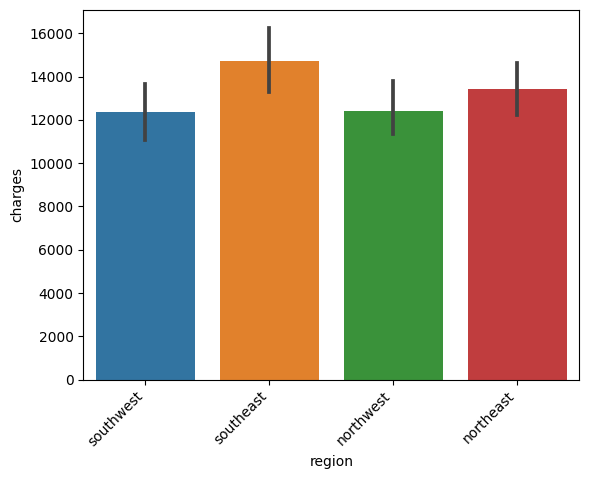

In [28]:
ax=sns.barplot(data=df, x = 'region',y = 'charges')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha= 'right')